# Project 3: Reinforcement learning

Author: Jakob Nyström

Date: 2021-03-11

## Introduction

In this project we will explore reinforcement learning (RL) with two simple examples. In both cases we have an agent that should find its way through a grid, following a policy for what action to take next. In the first case, the policy is given. In the second, we will use value iteration to derive the optimal policy.  

## Part 1

In this part the agent should move from the state $(0, 0)$ to $(5, 4)$ in a grid that is given by $S = \{f(x; y) \in \mathbb{N}^2; 0 \le x \le 5; 0 \le y \le 4\}$. It's only possible to move in one direction (not diagonally) so the set of actions can be represented by $A = \{(0,1), (1,0), (0,-1), (-1,0)\}$. Taking the action $a$ in state $s$ means the agent ends up in state $s+a$. The reward structure of this environment is given in Figure 1.

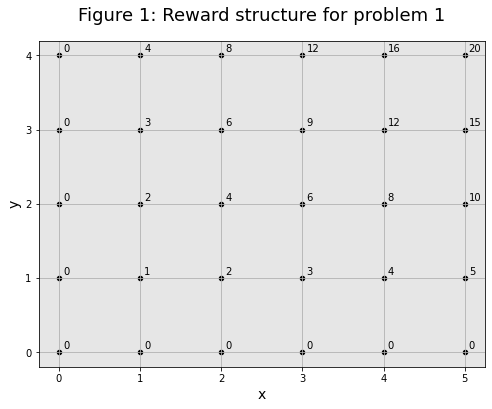

In [20]:
print()
plot_env_one()

In this case the agent should follow a greedy policy that maximizes the value of the next action. That is, the agent is not thinking more than one step ahead. The greedy policy is given by 

$$\pi(s) = \arg\max_{a\in A(s)} r(s,a)$$ 

where $a$ are the possible actions in state $s$. If multiple actions give the same reward, the agent should move in the upwards y direction.

There are a number of helper functions we define we need for this exercise, those are found in the appendix of the document. Below is the code that formulates the greedy policy and the code to calculate the value function $V^{\pi}(s)$ for the policy $\pi$, which we iterate over. The results of the value function is displayed in Table 1.

In [21]:
# Define greedy policy that maximizes reward for each individual step

def greedy_policy(state):
    
    actions = possible_actions(state)
    best_action = []
    
    reward = 0
    for a in actions:
        r = rewards(state, a)
        if r > reward:
            reward = r
            best_action = [a]
        elif reward == r and len(best_action) == 0:
            best_action = [a]
        elif reward == r and len(best_action) > 0:
            if a[1] > best_action[0][1]:
                best_action = [a]
            else:
                continue
        else:
            continue
            
    return best_action[0]

In [22]:
# Function for value iteration

def T_policy(value_old): 
    
    all_states = states()
    value_new = []
    
    for i in range(len(all_states)):
        state = all_states[i]
        value = 0
        for j in range(len(all_states)):
            new_state = all_states[j]
            value += value_old[j] * probability(new_state, state, greedy_policy(state))
        value_new.append(rewards(state, greedy_policy(state)) + value)
    
    return value_new

In [47]:
# Iterate over value function

def value_iteration():

    value_old = [0 for i in range(30)]

    for i in range(20):
        value_new = T_policy(value_old)
        print(value_new)
        if sum(value_new) == sum(value_old):
            break
        else:
            value_old = value_new
            
    all_states = states()
    
    print('Table 1: Value function for different starting states in first reward structure')
    print()
    print('x\ty\tvalue')
    print()
    for i in range(len(all_states)):
        print(str(all_states[i][0]) + '\t' + str(all_states[i][1]) + '\t' + str(value_new[i]))

    return value_new 

In [48]:
print()
value_iteration();


[0, 1, 2, 3, 4, 5, 1, 2, 4, 6, 8, 10, 2, 4, 6, 9, 12, 15, 3, 6, 9, 12, 16, 20, 4, 8, 12, 16, 20, 0]
[1, 3, 6, 9, 12, 15, 3, 6, 10, 15, 20, 25, 6, 10, 15, 21, 28, 35, 9, 15, 21, 28, 36, 20, 12, 20, 28, 36, 20, 0]
[3, 7, 12, 18, 24, 30, 7, 12, 19, 27, 36, 45, 12, 19, 27, 37, 48, 35, 18, 27, 37, 48, 36, 20, 24, 36, 48, 36, 20, 0]
[7, 13, 21, 30, 40, 50, 13, 21, 31, 43, 56, 45, 21, 31, 43, 57, 48, 35, 30, 43, 57, 48, 36, 20, 40, 56, 48, 36, 20, 0]
[13, 22, 33, 46, 60, 50, 22, 33, 47, 63, 56, 45, 33, 47, 63, 57, 48, 35, 46, 63, 57, 48, 36, 20, 60, 56, 48, 36, 20, 0]
[22, 34, 49, 66, 60, 50, 34, 49, 67, 63, 56, 45, 49, 67, 63, 57, 48, 35, 66, 63, 57, 48, 36, 20, 60, 56, 48, 36, 20, 0]
[34, 50, 69, 66, 60, 50, 50, 69, 67, 63, 56, 45, 69, 67, 63, 57, 48, 35, 66, 63, 57, 48, 36, 20, 60, 56, 48, 36, 20, 0]
[50, 70, 69, 66, 60, 50, 70, 69, 67, 63, 56, 45, 69, 67, 63, 57, 48, 35, 66, 63, 57, 48, 36, 20, 60, 56, 48, 36, 20, 0]
[70, 70, 69, 66, 60, 50, 70, 69, 67, 63, 56, 45, 69, 67, 63, 57, 48, 35

The table above gives the cumulative reward for the agent when starting in a certain state and move to (5, 4). Starting in (0, 0) the total reward is 70, which is also what we get if we just follow the greedy policy using pen and paper. In Figure 2 below we plot how the agent is moving through the grid to reach (5, 4). 

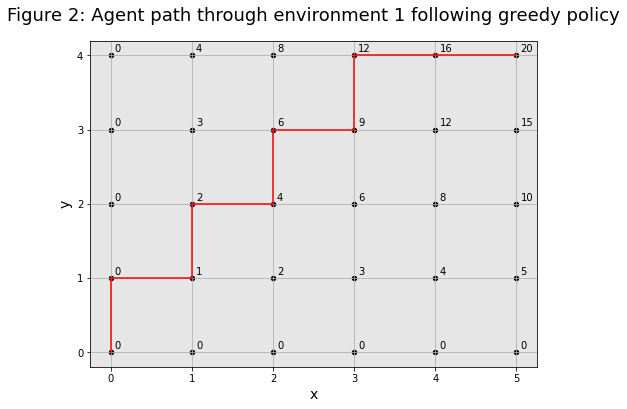

In [25]:
print()
plot_greedy_policy((0, 0))

## Part 2

The set-up of this problem is the same, but the reward structure is different (Figure 3 below). This time we are looking for an optimal policy, which we will get through value iteration. To find the optimal policy $\pi^{*}$ we use so called Bellman optimality equations. 

Let $V^{*}(s) = max_{\pi} V^{\pi}(s)$ and $Q^{*}(s) = \max_{\pi} Q^{\pi}(s,a)$. These are connected through the Bellman optimality equations like so: $V^{*}(s) = \max_{a} Q^{*}(s,a)$. If we can calculate these we also have the corresponding optimal policy. We can do this even if we have no idea what the optimal policy is: 

$$V^{*}(s) = \max_{a} Q^{*}(s,a) = \max_{a} (r(s,a)+\sum_{s'} V^{*}p(s'|s,a)$$

This means we want to maximize the action-value function with respect to $a$ which is the reward we get from taking $a$ in state $s$ plus the sum of the value function for the subsequent steps times the probability of these states given that we take action $a$. Through the iterative process called value iteration, we can find the optimal policy $\pi^{*}$ using the above.

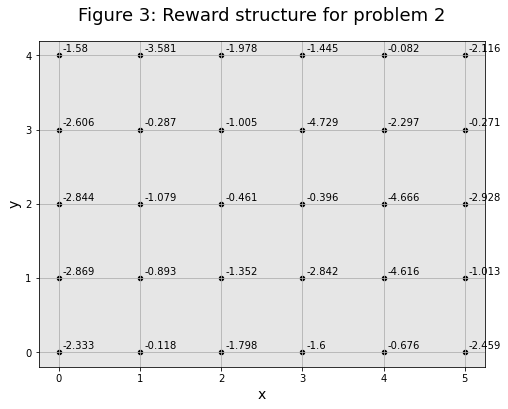

In [26]:
print()
plot_env_two()

In the code below we perform the value iteration, derive the optimal policy from this, and show the value function for the different starting states. Finally, we plot how the agent is moving through the grid according to the optimal policy.

In [27]:
def T_optimal(value_old):
    
    all_states = states()
    value_new = []
    
    for i in range(len(all_states)):
        state = all_states[i]
        q_state = []
        
        for action in possible_actions(state):
            q_state_action = 0
            
            for j in range(len(all_states)):
                new_state = all_states[j]
                q_state_action += (rewards_two(state, action) + value_old[j]) * probability(new_state, state, action)
            q_state.append(q_state_action)
        
        if q_state is None:
            value_state = 0
        else: 
            value_state = max(q_state)
        value_new.append(value_state)
    
    return value_new

In [49]:
all_iterations = {}
iterations = 25

def value_iteration_two():

    value_old = [0 for i in range(30)]

    for i in range(1, iterations + 1):
        value_new = T_optimal(value_old)
        print(value_new)
        all_iterations[i] = value_new
        value_old = value_new
            
    all_states = states()
    
    print('Table 2: Value function for different starting states in second reward structure')
    print()
    print('x\ty\tvalue')
    print()
    for i in range(len(all_states)):
        print(str(all_states[i][0]) + '\t' + str(all_states[i][1]) + '\t' + str(round(value_new[i], 3)))
        
    return value_new, all_iterations

In [50]:
print()
value_iteration_two();


[-0.118, -0.893, -0.118, -0.676, -1.6, -0.676, -0.893, -0.118, -0.461, -0.396, -0.676, -2.459, -1.079, -0.287, -0.396, -0.461, -0.396, -0.271, -0.287, -1.005, -0.287, -0.396, -0.082, -2.116, -2.606, -0.287, -1.005, -0.082, -1.445, 0]
[-1.0110000000000001, -1.0110000000000001, -1.0110000000000001, -1.916, -2.2760000000000002, -2.2760000000000002, -1.0110000000000001, -1.0110000000000001, -0.857, -0.857, -2.2760000000000002, -3.1350000000000002, -1.3659999999999999, -0.857, -0.857, -0.857, -0.857, -2.387, -1.2919999999999998, -1.2919999999999998, -0.857, -0.857, -1.5270000000000001, -2.116, -2.893, -1.2919999999999998, -1.2919999999999998, -1.5270000000000001, -1.5270000000000001, 0.0]
[-1.129, -1.9040000000000001, -1.129, -2.809, -3.516, -2.9520000000000004, -1.9040000000000001, -1.129, -1.318, -1.2530000000000001, -2.9520000000000004, -4.735, -1.936, -1.318, -1.2530000000000001, -1.318, -1.2530000000000001, -2.387, -1.5789999999999997, -1.8619999999999999, -1.318, -1.2530000000000001,

[-9.003, -8.885, -8.439, -9.463, -8.786999999999999, -6.327999999999999, -8.885, -7.991999999999999, -7.087, -7.483, -6.327999999999999, -5.3149999999999995, -7.991999999999999, -6.912999999999999, -6.6259999999999994, -7.087, -4.495, -2.387, -6.912999999999999, -6.6259999999999994, -5.6209999999999996, -3.643, -2.198, -2.116, -9.202, -5.6209999999999996, -3.643, -2.198, -2.116, 0.0]
[-9.003, -8.885, -8.439, -9.463, -8.786999999999999, -6.327999999999999, -8.885, -7.991999999999999, -7.087, -7.483, -6.327999999999999, -5.3149999999999995, -7.991999999999999, -6.912999999999999, -6.6259999999999994, -7.087, -4.495, -2.387, -6.912999999999999, -6.6259999999999994, -5.6209999999999996, -3.643, -2.198, -2.116, -9.202, -5.6209999999999996, -3.643, -2.198, -2.116, 0.0]
[-9.003, -8.885, -8.439, -9.463, -8.786999999999999, -6.327999999999999, -8.885, -7.991999999999999, -7.087, -7.483, -6.327999999999999, -5.3149999999999995, -7.991999999999999, -6.912999999999999, -6.6259999999999994, -7.087,

We can see from Table 2 that the optimal policy yields a reward of -9.003 when starting in (0,0) and moving to (5,4). Below we define a function for the optimal policy in each state, which is based on maximizing the action-value function:

$$\pi^{*}(s) = \arg\max_{a} Q^{*}(s,a)$$

We also plot how the agent is moving in Figure 4.

In [30]:
def optimal_policy(best_actions):
    
    value_iteration = all_iterations[iterations]
    all_states = states()
    state_values = {all_states[i]: value_iteration[i] for i in range(len(all_states))}
    
    for state in all_states:
        state_action_values = 0
        
        for action in possible_actions(state):
            new_state = state[0] + action[0], state[1] + action[1]
            value = rewards_two(state, action) + state_values.get(new_state)
            
            if state_action_values == 0:
                state_action_values = value
                best_actions[state] = action
            elif value > state_action_values:
                state_action_values = value
                best_actions[state] = action
            else:
                continue

    return best_actions

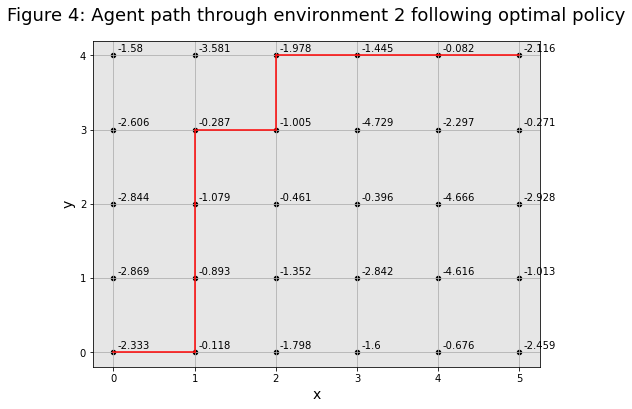

In [31]:
print()
plot_optimal_policy((0, 0));

## Summary

In this project we used RL to make an agent move through an environment following a certain policy. First the policy was given, in the second part we used value iteration to find the optimal policy.

## Appendix

Below are all the helper functions that are used in this project

- states: Defines the possible states in the environment
- possible_actions: What actions the agent is allowed to take in each state 
- rewards: The rewards given in each from each action in environment 1
- probability: The transition probability between states: either 1 or 0 depending on state and action
- plot_greedy_policy: Plots how the agent is moving in environment 1
- rewards_two: The rewards given from each action in environment 2
- reward_grid: All the rewards per state in part 2
- plot_optimal_policy: Plots how the agent is moving in environment 2
- plot_env_one: The structure of environment 1
- plot_env_two: The structure of environment 2

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker

In [33]:
def states():
    return [(i, j) for j in range(5) for i in range(6)]

In [34]:
# Function for possible actions to take

def possible_actions(state):
    
    actions = [(0, 1), (1, 0), (-1, 0), (0, -1)]
    
    not_allowed = []
    if state == (5, 4):
        actions = [(0, 0)]
    else:
        for i in range(len(actions)):
            new_state = (state[0] + actions[i][0], state[1] + actions[i][1])
            if new_state[0] < 0 or new_state[1] < 0 or new_state[0] > 5 or new_state[1] > 4:
                not_allowed.append(i)
            else:
                continue

    for i in range(len(not_allowed)):
        actions[not_allowed[i]] = None
    
    actions = [i for i in actions if i]
    
    return actions

In [35]:
# Function for expected reward per state

def rewards(state, action):
    
    new_state = (state[0] + action[0], state[1] + action[1])
    if state == (5, 4):
        reward = 0
    else:
        reward = np.prod(new_state)
        
    return reward

In [36]:
# Function for transition probabilities between states: p(s'|s, a)

def probability(new_state, state, action):
    
    if state == (5, 4):
        return 0
    if (state[0] + action[0], state[1] + action[1]) == new_state:
        return 1
    else:
        return 0

In [37]:
def plot_greedy_policy(state):
    
    all_states = states()
    x_values = []
    y_values = []

    for x, y in all_states:
        x_values.append(x)
        y_values.append(y)

    fig, ax = plt.subplots(figsize=(8, 6))

    plt.scatter(x_values, y_values, c='black', s=20)
    plt.grid()
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('y', fontsize = 14)
    ax.set_facecolor('0.9')
    plt.title('Figure 2: Agent path through environment 1 following greedy policy', fontsize=18, pad=20)
    
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))

    for x, y in zip(x_values, y_values):
        ax.annotate(x * y, (x + 0.05, y + 0.05))
    
    state = (0, 0)
    while state != (5,4):
        action = greedy_policy(state)
        new_state = state[0] + action[0], state[1] + action[1]
        plt.plot([state[0], new_state[0]], [state[1], new_state[1]], c='red')
        state = new_state

    plt.show()

In [38]:
def rewards_two(state, action):
    
    values = [2.333, 0.118, 1.798, 1.600, 0.676, 2.459, 
               2.869, 0.893, 1.352, 2.842, 4.616, 1.013, 
               2.844, 1.079, 0.461, 0.396, 4.666, 2.928, 
               2.606, 0.287, 1.005, 4.729, 2.297, 0.271, 
               1.580, 3.581, 1.978, 1.445, 0.082, 2.116]
    
    values = [-x for x in values]
    all_states = states()
    state_rewards = {all_states[i]: values[i] for i in range(len(all_states))}
    
    new_state = (state[0] + action[0], state[1] + action[1])
    
    if state == (5, 4):
        reward = 0
    else:
        reward = state_rewards.get(new_state)
        
    return reward

In [39]:
def reward_grid(new_state):
    
    values = [2.333, 0.118, 1.798, 1.600, 0.676, 2.459, 
               2.869, 0.893, 1.352, 2.842, 4.616, 1.013, 
               2.844, 1.079, 0.461, 0.396, 4.666, 2.928, 
               2.606, 0.287, 1.005, 4.729, 2.297, 0.271, 
               1.580, 3.581, 1.978, 1.445, 0.082, 2.116]
    
    values = [-x for x in values]
    all_states = states()
    state_rewards = {all_states[i]: values[i] for i in range(len(all_states))}
    reward = state_rewards.get(new_state)
        
    return reward

In [40]:
def plot_optimal_policy(state):
    
    best_actions = {}
    policy = optimal_policy(best_actions)
    all_states = states()
    x_values = []
    y_values = []

    for x, y in all_states:
        x_values.append(x)
        y_values.append(y)

    fig, ax = plt.subplots(figsize=(8, 6))

    plt.scatter(x_values, y_values, c='black', s=20)
    plt.grid()
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('y', fontsize = 14)
    ax.set_facecolor('0.9')
    plt.title('Figure 4: Agent path through environment 2 following optimal policy', fontsize=18, pad=20)
    
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))

    for x, y in zip(x_values, y_values):
        ax.annotate(reward_grid((x, y)), (x + 0.05, y + 0.05))
    
    while state != (5,4):
        action = policy.get(state)
        new_state = state[0] + action[0], state[1] + action[1]
        plt.plot([state[0], new_state[0]], [state[1], new_state[1]], c='red')
        state = new_state

    plt.show()

In [41]:
def plot_env_one():
    
    all_states = states()
    x_values = []
    y_values = []

    for x, y in all_states:
        x_values.append(x)
        y_values.append(y)

    fig, ax = plt.subplots(figsize=(8, 6))

    plt.scatter(x_values, y_values, c='black', s=20)
    plt.grid()
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('y', fontsize = 14)
    plt.title('Figure 1: Reward structure for problem 1', fontsize=18, pad=20)
    ax.set_facecolor('0.9')
    
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))

    for x, y in zip(x_values, y_values):
        ax.annotate(x * y, (x + 0.05, y + 0.05))

In [42]:
def plot_env_two():

    all_states = states()
    x_values = []
    y_values = []

    for x, y in all_states:
        x_values.append(x)
        y_values.append(y)

    fig, ax = plt.subplots(figsize=(8, 6))

    plt.scatter(x_values, y_values, c='black', s=20)
    plt.grid()
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('y', fontsize = 14)
    ax.set_facecolor('0.9')
    plt.title('Figure 3: Reward structure for problem 2', fontsize=18, pad=20)
    
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_locator(ticker.MaxNLocator(integer=True))

    for x, y in zip(x_values, y_values):
        ax.annotate(reward_grid((x, y)), (x + 0.05, y + 0.05))

    plt.show()

In [43]:
states()

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (0, 2),
 (1, 2),
 (2, 2),
 (3, 2),
 (4, 2),
 (5, 2),
 (0, 3),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 3),
 (5, 3),
 (0, 4),
 (1, 4),
 (2, 4),
 (3, 4),
 (4, 4),
 (5, 4)]